In [13]:
import pandas as pd
dftrain=pd.read_csv(r"C:\Users\polpi\Desktop\data science\assignments\XGBM & LGBM\Titanic_train.csv")
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dftrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
print("Since Age has 177 NAN we will dropna \nhowever, cabin has 687 NAN dropping those will reduce the training data size a lot. \nWe would drop the entire cabin column")
dftrain=dftrain.drop('Cabin',axis=1)
dftrain_cleaned=dftrain.dropna()
dftrain_cleaned

Since Age has 177 NAN we will dropna 
however, cabin has 687 NAN dropping those will reduce the training data size a lot. 
We would drop the entire cabin column


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [15]:
dftrain_cleaned=dftrain_cleaned.drop(['PassengerId','Name','Ticket'], axis=1)
dftrain_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
unique_embarked = dftrain_cleaned['Embarked'].unique()

print(unique_embarked)

['S' 'C' 'Q']


In [17]:
print("We will use dictionary style to encode")
sex_type={'male':1,'female':0}
embarked_types={'S':2,'C':1,'Q':0}
dftrain_cleaned['Sex'] = dftrain_cleaned['Sex'].map(sex_type)
dftrain_cleaned['Embarked'] = dftrain_cleaned['Embarked'].map(embarked_types)
dftrain_cleaned

We will use dictionary style to encode


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,0
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,1


In [18]:
dftrain_cleaned.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,1.738764
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


C:\Users\polpi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


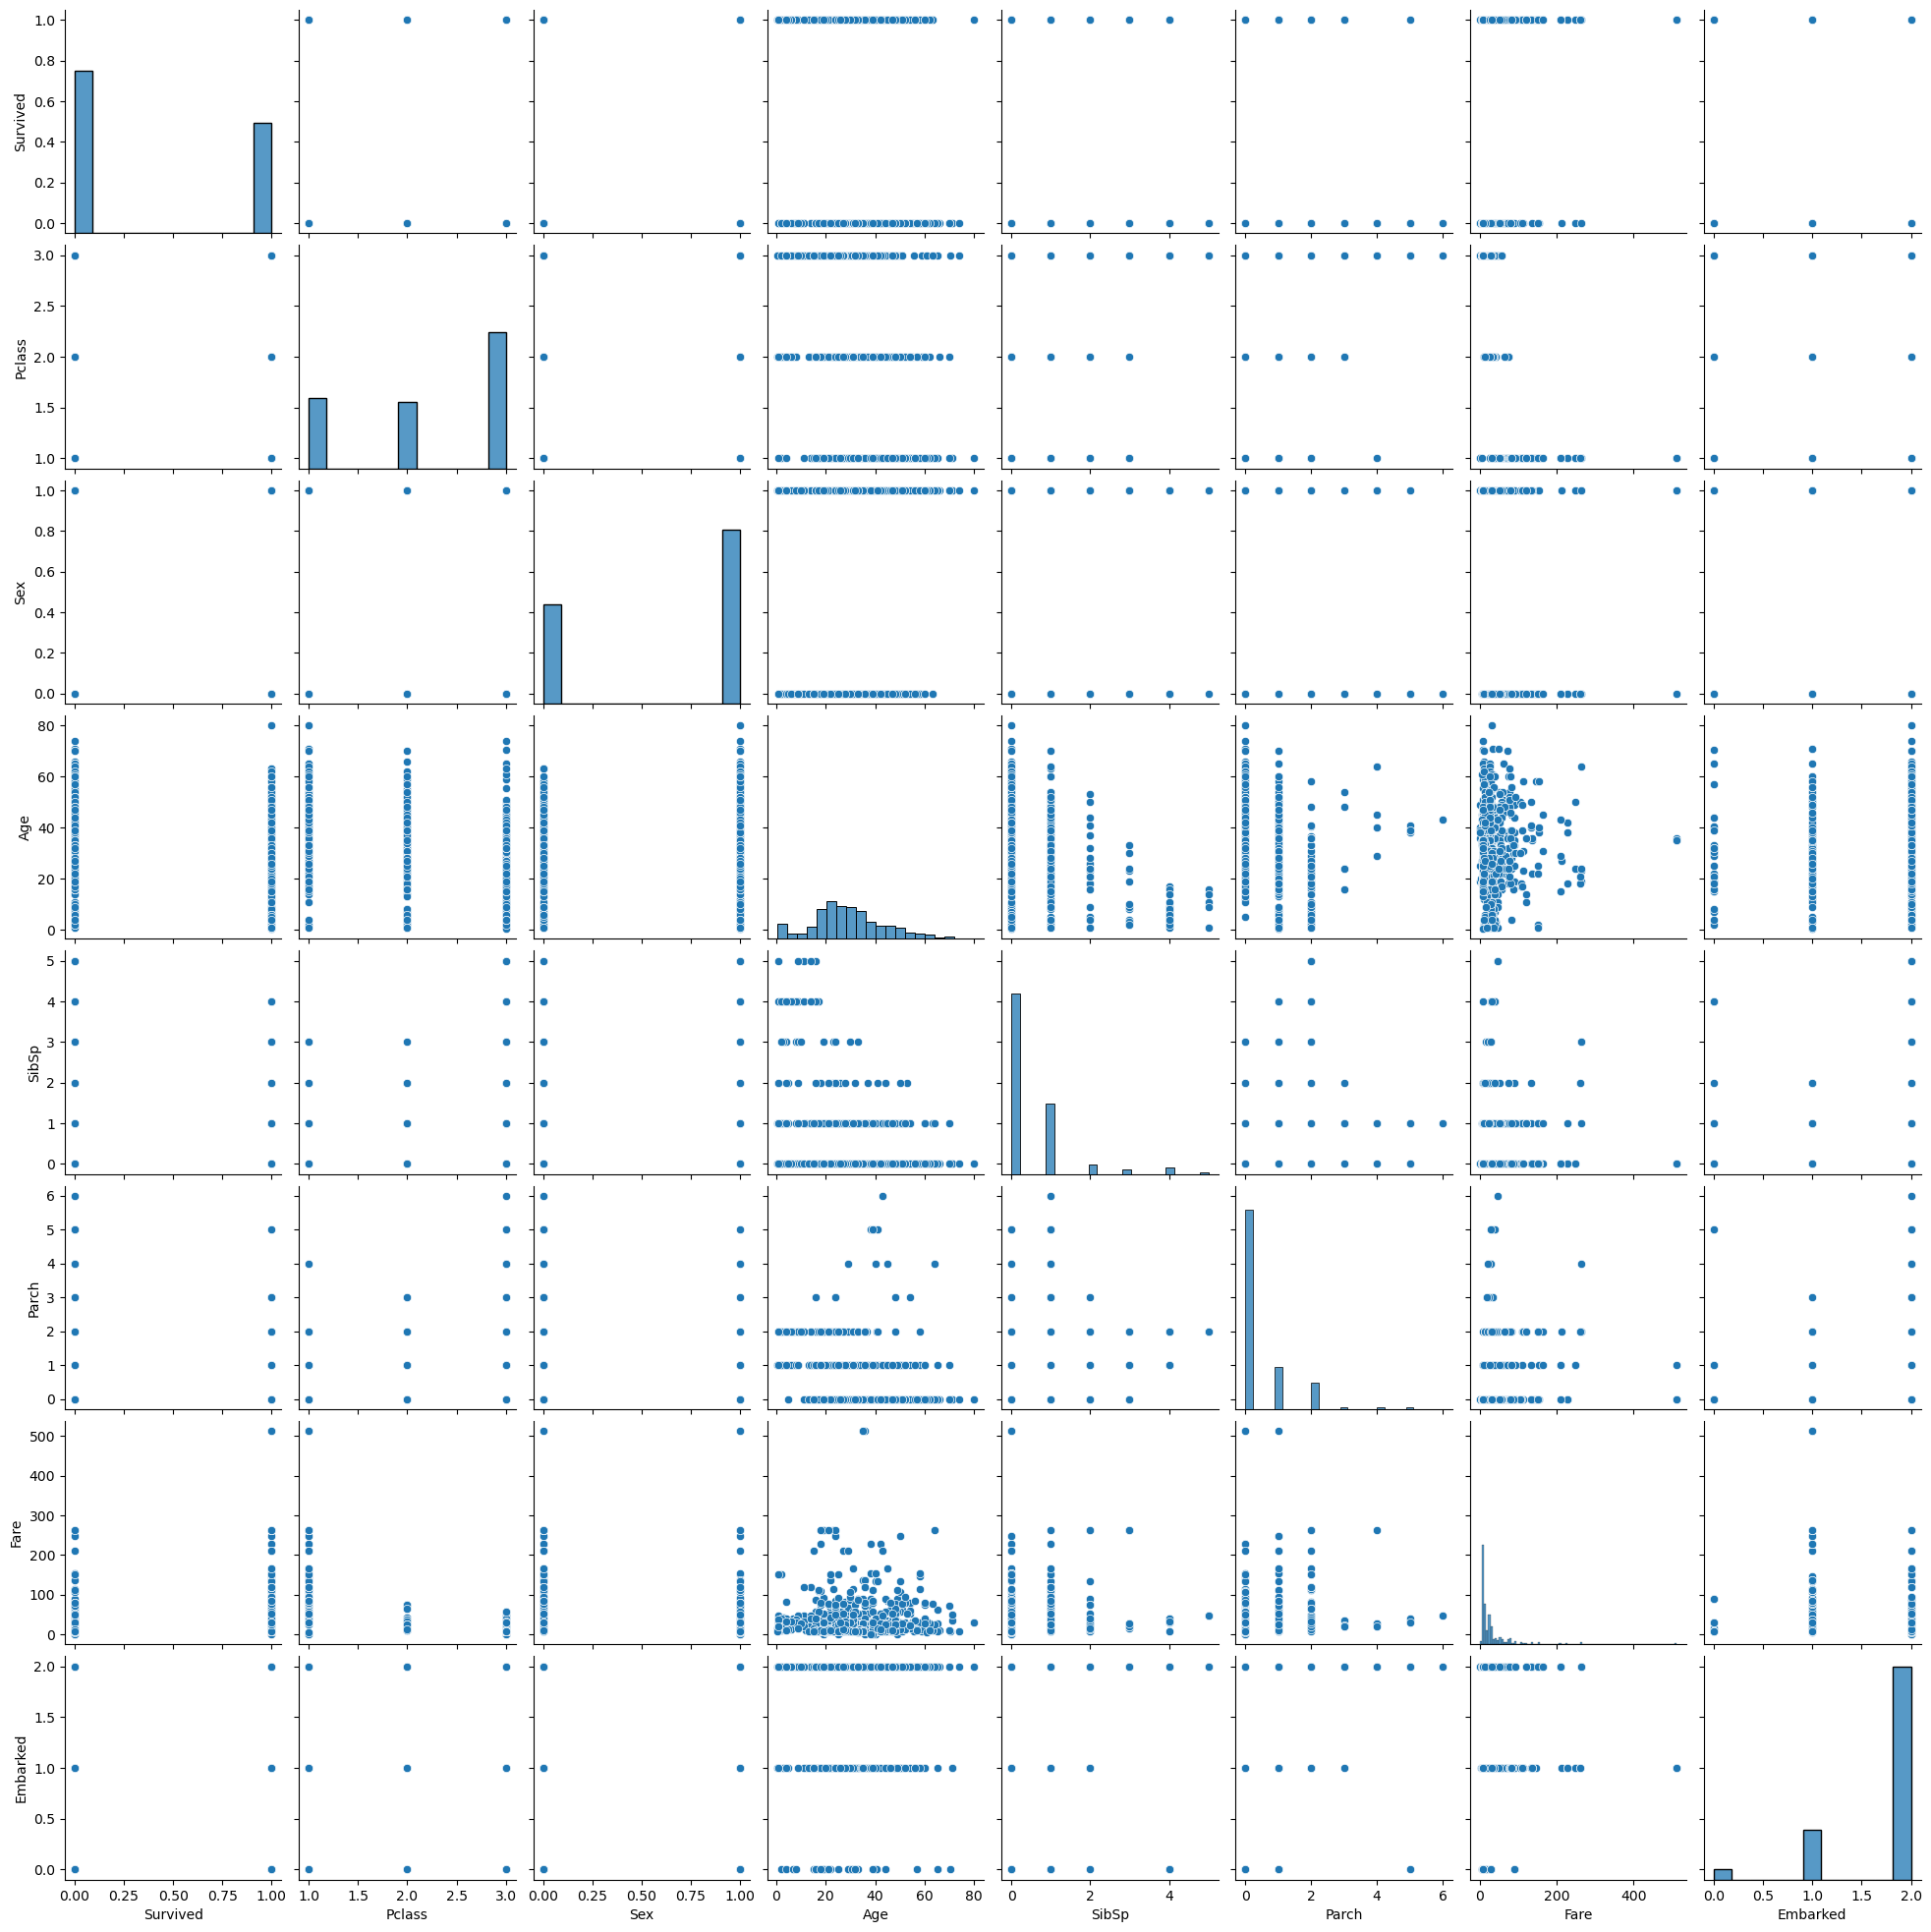

In [20]:
import seaborn as sns
sns.pairplot(dftrain_cleaned)

Although there are outliers, these will help us train our model better. 
Especially, the embarked boxplot shows only 2, the rest two as outliers
which would be counterproductive


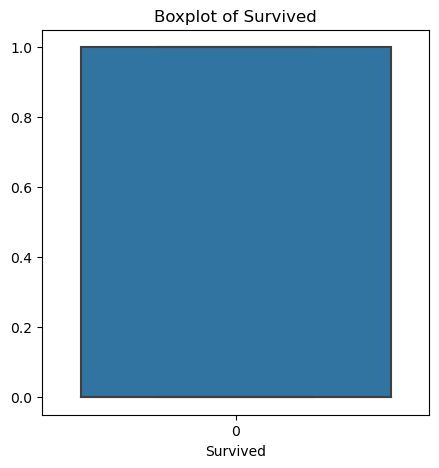

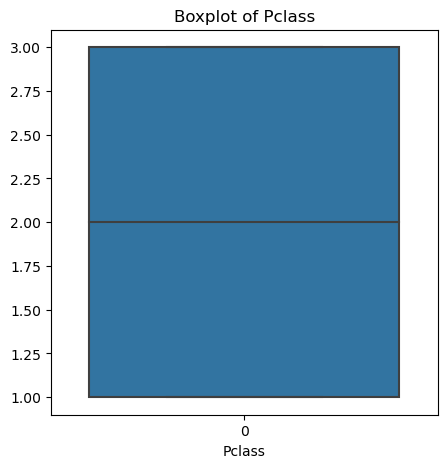

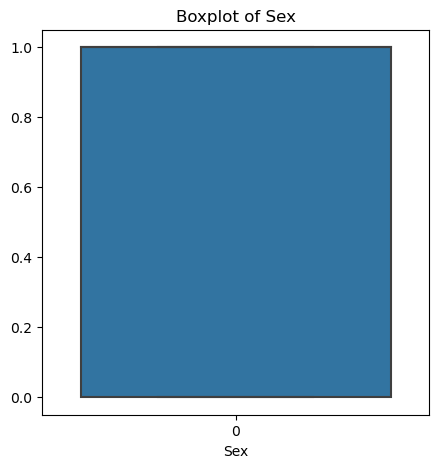

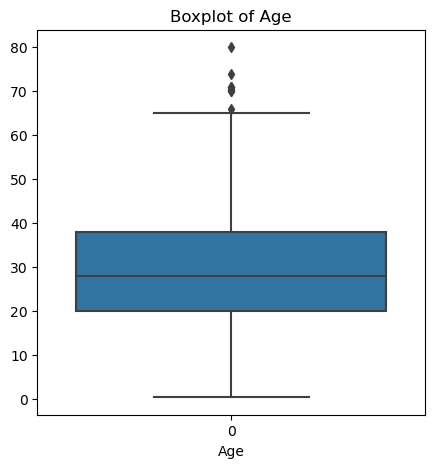

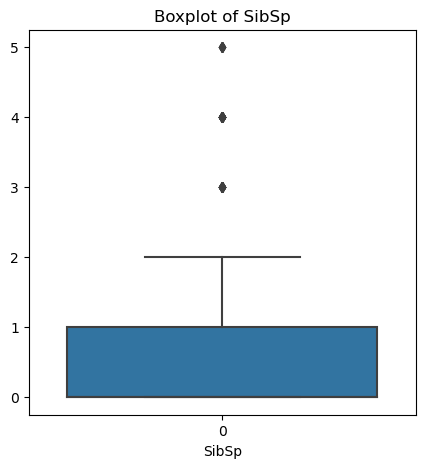

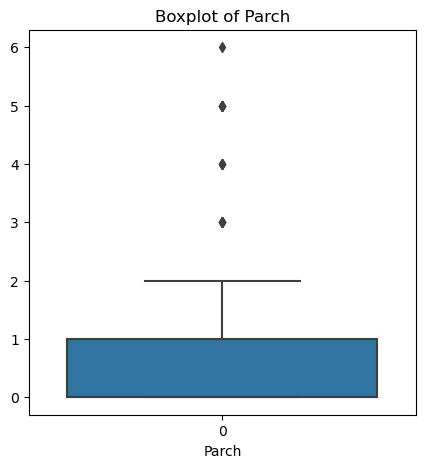

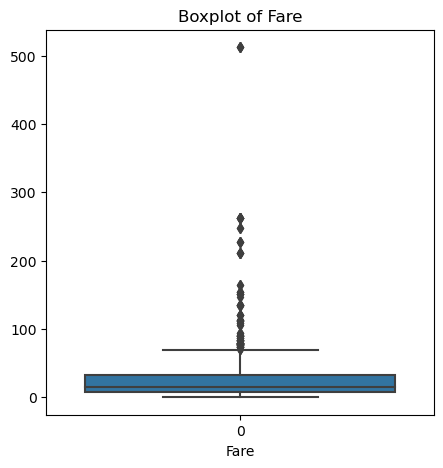

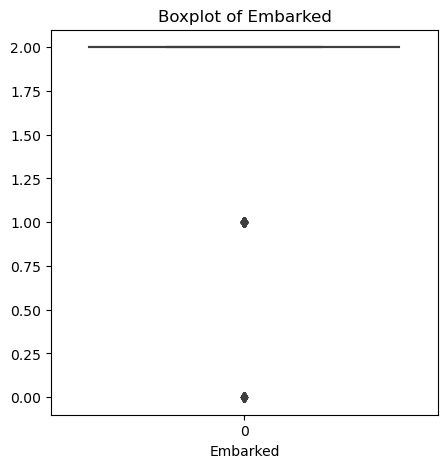

In [23]:
print("Although there are outliers, these will help us train our model better. \nEspecially, the embarked boxplot shows only 2, the rest two as outliers\nwhich would be counterproductive")
import matplotlib.pyplot as plt
for col in dftrain_cleaned:
    plt.figure(figsize=(5, 5))
    sns.boxplot(dftrain_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [28]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgbm
import numpy as np
ss=StandardScaler()
x_sub=dftrain_cleaned.drop('Survived', axis=1)
y=dftrain_cleaned['Survived']

In [29]:
x=ss.fit_transform(x_sub)
x=pd.DataFrame(x,columns=x_sub.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.908600,0.756138,-0.527669,0.522511,-0.506787,-0.516380,0.501226
1,-1.482983,-1.322511,0.577094,0.522511,-0.506787,0.694046,-1.417445
2,0.908600,-1.322511,-0.251478,-0.552714,-0.506787,-0.503620,0.501226
3,-1.482983,-1.322511,0.369951,0.522511,-0.506787,0.350326,0.501226
4,0.908600,0.756138,0.369951,-0.552714,-0.506787,-0.501257,0.501226
...,...,...,...,...,...,...,...
707,0.908600,-1.322511,0.646142,-0.552714,5.350885,-0.102875,-3.336115
708,-0.287191,0.756138,-0.182430,-0.552714,-0.506787,-0.407687,0.501226
709,-1.482983,-1.322511,-0.734812,-0.552714,-0.506787,-0.086335,0.501226
710,-1.482983,0.756138,-0.251478,-0.552714,-0.506787,-0.086335,-1.417445


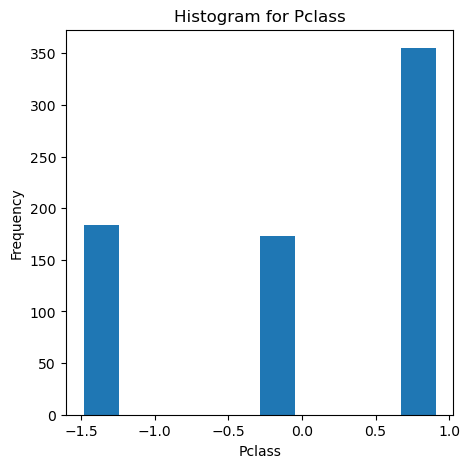

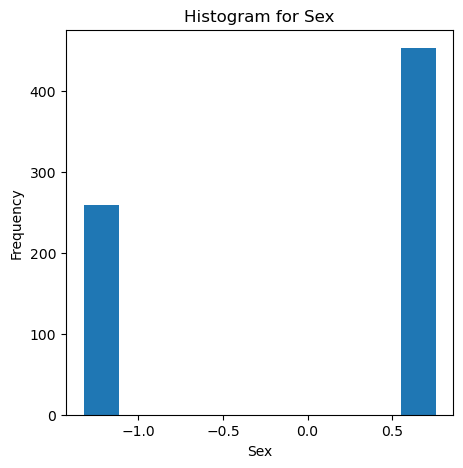

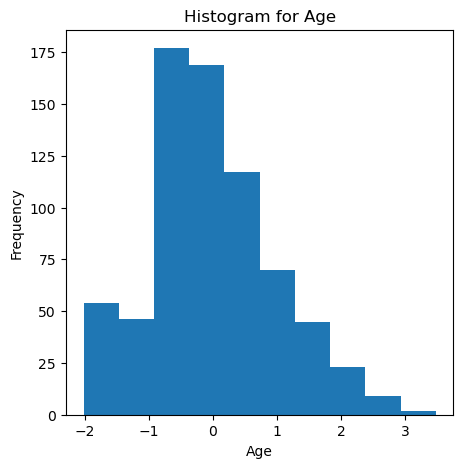

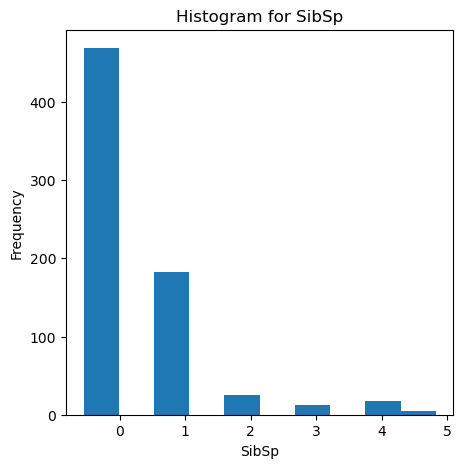

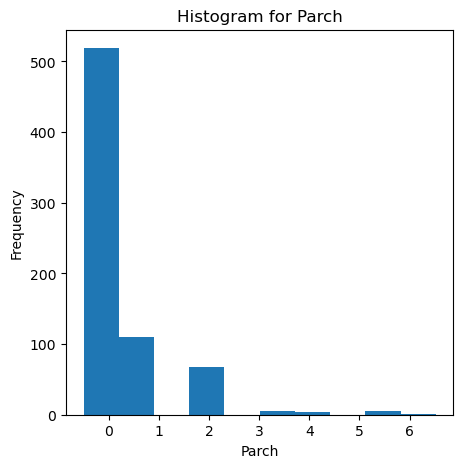

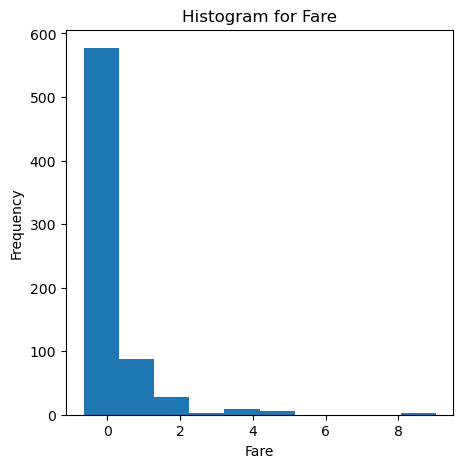

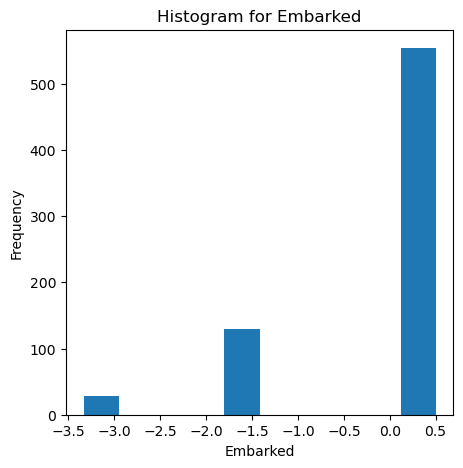

In [30]:
for col in x.columns:
    plt.figure(figsize=(5,5))
    plt.hist(x[col],bins=10)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [53]:
x_train,x_test,y_train,y_test=tts(x,y,train_size=0.9,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((640, 7), (72, 7), (640,), (72,))

[LightGBM] [Info] Number of positive: 258, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.403125 -> initscore=-0.392461
[LightGBM] [Info] Start training from score -0.392461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

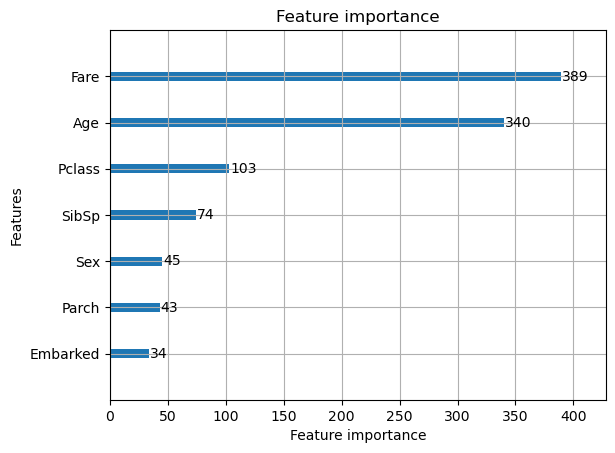

In [104]:
best_param={'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 30, 'num_leaves': 20, 'subsample': 0.6}
model=lgbm.LGBMClassifier(**best_param,random_state=42)
model.fit(x_train,y_train)
lgbm.plot_importance(model)

In [105]:
y_pred=model.predict(x_test)

In [85]:
confusion_matrix(y_test,y_pred)

array([[37,  5],
       [ 9, 21]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.81      0.70      0.75        30

    accuracy                           0.81        72
   macro avg       0.81      0.79      0.80        72
weighted avg       0.81      0.81      0.80        72



In [87]:
print("Let's use this model for testing the Titanic test file.")
dftest=pd.read_csv(r"C:\Users\polpi\Desktop\data science\assignments\XGBM & LGBM\Titanic_test.csv")
dftest

Let's use this model for testing the Titanic test file.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [64]:
dftest1=dftest.drop(['Cabin'],axis=1)
dftest1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [65]:
dftest1.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [66]:
dftest2=dftest1.dropna()
dftest2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


In [67]:
dftest2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [68]:
dftest_cleaned=dftest2.drop(['PassengerId','Name','Ticket'],axis=1)
dftest_cleaned

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
409,3,female,3.0,1,1,13.7750,S
411,1,female,37.0,1,0,90.0000,Q
412,3,female,28.0,0,0,7.7750,S
414,1,female,39.0,0,0,108.9000,C


In [69]:
dftest_cleaned.describe()

,Pclass,Age,SibSp,Parch,Fare
count,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2.141994,30.181269,0.483384,0.398792,40.982087
std,0.846251,14.104573,0.875004,0.811582,61.228558
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,27.000000,0.000000,0.000000,16.000000
75%,3.000000,39.000000,1.000000,1.000000,40.633350
max,3.000000,76.000000,8.000000,6.000000,512.329200


In [52]:
dftest_cleaned.info

<bound method DataFrame.info of      Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
..      ...     ...   ...    ...    ...       ...      ...
409       3  female   3.0      1      1   13.7750        S
411       1  female  37.0      1      0   90.0000        Q
412       3  female  28.0      0      0    7.7750        S
414       1  female  39.0      0      0  108.9000        C
415       3    male  38.5      0      0    7.2500        S

[331 rows x 7 columns]>

In [70]:
sex_type={'male':1,'female':0}
embarked_types={'S':2,'C':1,'Q':0}
dftest_cleaned['Sex']=dftest_cleaned['Sex'].map(sex_type)
dftest_cleaned['Embarked']=dftest_cleaned['Embarked'].map(embarked_types)
dftest_cleaned

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
409,3,0,3.0,1,1,13.7750,2
411,1,0,37.0,1,0,90.0000,0
412,3,0,28.0,0,0,7.7750,2
414,1,0,39.0,0,0,108.9000,1


In [72]:
xtest=ss.fit_transform(dftest_cleaned)
x_test2=pd.DataFrame(xtest,columns=dftest_cleaned.columns)
x_test2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.015426,0.789018,0.306657,-0.553272,-0.492120,-0.542281,-2.666898
1,1.015426,-1.267399,1.194236,0.591310,-0.492120,-0.555844,0.626920
2,-0.168046,0.789018,2.259331,-0.553272,-0.492120,-0.511885,-2.666898
3,1.015426,0.789018,-0.225890,-0.553272,-0.492120,-0.528651,0.626920
4,1.015426,-1.267399,-0.580922,0.591310,0.741907,-0.469357,0.626920
...,...,...,...,...,...,...,...
326,1.015426,-1.267399,-1.930042,0.591310,0.741907,-0.445026,0.626920
327,-1.351518,-1.267399,0.484173,0.591310,-0.492120,0.801785,-2.666898
328,1.015426,-1.267399,-0.154884,-0.553272,-0.492120,-0.543168,0.626920
329,-1.351518,-1.267399,0.626186,-0.553272,-0.492120,1.110932,-1.019989


In [73]:
x_test.shape,x_test2.shape

((72, 7), (331, 7))

In [88]:
y_pred2=model.predict(x_test2)

In [89]:
Final=pd.DataFrame({'PassengerID':dftest2['PassengerId'],'Name':dftest2['Name'], 'Survived':y_pred2})
Final

,PassengerID,Name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
...,...,...,...
409,1301,"Peacock, Miss. Treasteall",1
411,1303,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1
412,1304,"Henriksson, Miss. Jenny Lovisa",1
414,1306,"Oliva y Ocana, Dona. Fermina",1


In [79]:
print("This is a prediction of survival for the test dataset of Titanic")

This is a prediction of survival for the test dataset of Titanic


In [80]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,0.9],
    'num_leaves': [20, 31, 40, 60],
    'max_depth': [-10,-5,-1, 5, 10, 15],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=3, 
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Fitting 3 folds for each of 3888 candidates, totalling 11664 fits
[LightGBM] [Info] Number of positive: 258, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.403125 -> initscore=-0.392461
[LightGBM] [Info] Start training from score -0.392461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [90]:
print("Using GridsearchCV the best parameters were found and used in LGBM classifier modelling.\nThe accuracy is pretty good=81%")

Using GridsearchCV the best parameters were found and used in LGBM classifier modelling.
The accuracy is pretty good=81%


In [100]:
print("Lets model using XGBoost now")
from xgboost import XGBClassifier
best_params2={'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
model2 = XGBClassifier(**best_params2,random_state=42, use_label_encoder=False, eval_metric='logloss')
model2.fit(x_train,y_train)
y_xgb_pred=model2.predict(x_test)
confusion_matrix(y_test,y_xgb_pred)

Lets model using XGBoost now


C:\Users\polpi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:51:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


array([[39,  3],
       [13, 17]], dtype=int64)

In [101]:
print(classification_report(y_test,y_xgb_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        42
           1       0.85      0.57      0.68        30

    accuracy                           0.78        72
   macro avg       0.80      0.75      0.75        72
weighted avg       0.79      0.78      0.77        72



In [97]:
model2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=3, 
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation score: 0.82


In [102]:
y_xgb_pred2=model2.predict(x_test2)

In [103]:
Final_xgb=pd.DataFrame({'PassengerID':dftest2['PassengerId'],'Name':dftest2['Name'], 'Survived':y_xgb_pred2})
Final_xgb

,PassengerID,Name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
...,...,...,...
409,1301,"Peacock, Miss. Treasteall",1
411,1303,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1
412,1304,"Henriksson, Miss. Jenny Lovisa",0
414,1306,"Oliva y Ocana, Dona. Fermina",1


In [114]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
def score_cal(a,b):
    ascore=accuracy_score(a,b)
    fscore=f1_score(a,b)
    pscore=precision_score(a,b)
    rscore=recall_score(a,b)
    print(f"Accuracy score: {ascore}")
    print(f"f1 score: {fscore}")
    print(f"Precission score: {pscore}")
    print(f"Recall score: {rscore}")
    results_df = pd.DataFrame({
        'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
        'Score': [ascore, fscore, pscore, rscore]
    })
    
    return results_df

In [117]:
lgbm_scores=score_cal(y_test,y_pred)
lgbm_scores

Accuracy score: 0.8055555555555556
f1 score: 0.75
Precission score: 0.8076923076923077
Recall score: 0.7


,Metric,Score
0,Accuracy,0.805556
1,F1 Score,0.750000
2,Precision,0.807692
3,Recall,0.700000


In [118]:
xgb_scores=score_cal(y_test,y_xgb_pred)
xgb_scores

Accuracy score: 0.7777777777777778
f1 score: 0.68
Precission score: 0.85
Recall score: 0.5666666666666667


,Metric,Score
0,Accuracy,0.777778
1,F1 Score,0.680000
2,Precision,0.850000
3,Recall,0.566667


In [121]:
lgbm_scores['Model'] = 'LightGBM'
xgb_scores['Model'] = 'XGBoost'
combined_scores = pd.concat([lgbm_scores, xgb_scores])
combined_scores

,Metric,Score,Model
0,Accuracy,0.805556,LightGBM
1,F1 Score,0.750000,LightGBM
2,Precision,0.807692,LightGBM
3,Recall,0.700000,LightGBM
0,Accuracy,0.777778,XGBoost
1,F1 Score,0.680000,XGBoost
2,Precision,0.850000,XGBoost
3,Recall,0.566667,XGBoost


In [123]:
comparison_df = combined_scores.pivot(index='Metric', columns='Model', values='Score')
comparison_df

Model,LightGBM,XGBoost
Metric,,
Accuracy,0.805556,0.777778
F1 Score,0.750000,0.680000
Precision,0.807692,0.850000
Recall,0.700000,0.566667


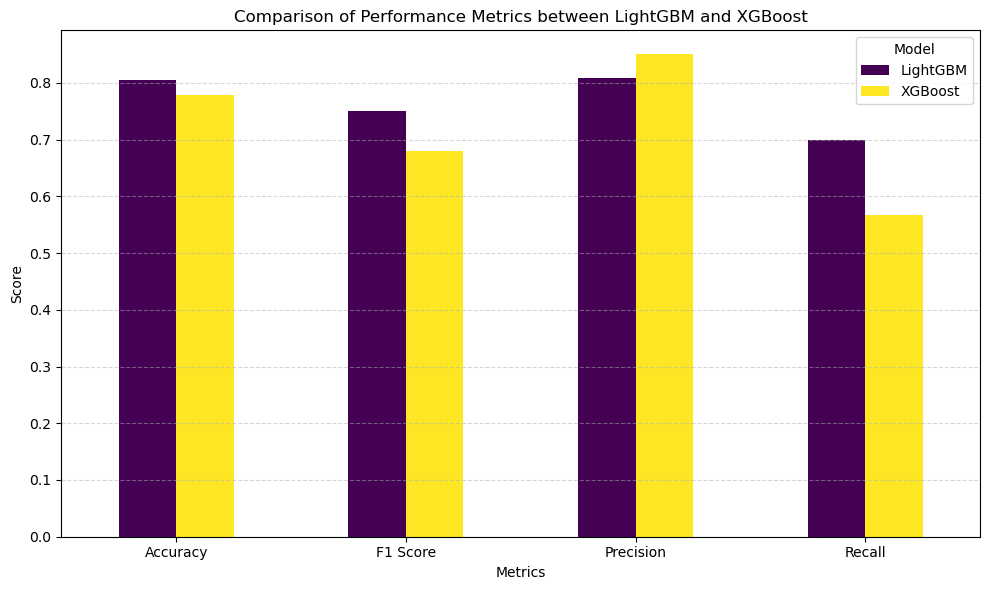

In [124]:
comparison_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of Performance Metrics between LightGBM and XGBoost')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [129]:
print("LGBM model gives better accuracy and higher f1 score which are indicators of good model.\nHowever, XGBoost model has higher precision but lower recall, which indicates that it might be better at avoiding \nfalse positives but may miss some positive cases")
print("The F1 score, which balances precision and recall, was higher for LightGBM, \nsuggesting that it provided a better balance between sensitivity and precision")
print("")
print("LGBM is used wher high recall is critical like in medical diagnosis")
print("XGBoost is great in places where high precisions are required avoiding false positives for example in quality control uses.")

LGBM model gives better accuracy and higher f1 score which are indicators of good model.
However, XGBoost model has higher precision but lower recall, which indicates that it might be better at avoiding 
false positives but may miss some positive cases
The F1 score, which balances precision and recall, was higher for LightGBM, 
suggesting that it provided a better balance between sensitivity and precision

LGBM is used wher high recall is critical like in medical diagnosis
XGBoost is great in places where high precisions are required avoiding false positives for example in quality control uses.
